# Problem 3
## Problem description
So far, we have worked with ~2 dimensional problems with 2-3 classes. Most often in ML, there are many more explanatory variables and classes than this. In this problem, you'll be training logistic regression models on a database of grayscale images of hand-drawn digits, using SciKit-Learn. Now there are 400 (20x20) input features and 10 classes (digits 0-9).

As usual, you can use any code from previous problems.

## Summary of deliverables
- OvR model accuracy on training data
- OvR model accuracy on testing data
- Multinomial model accuracy on training data
- Multinomial model accuracy on testing data


### Imports and Utility Functions:


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

def visualize(xdata, index, title=""):
    image = xdata[index,:].reshape(20,20).T
    plt.figure()
    plt.imshow(image,cmap = "binary")
    plt.axis("off")
    plt.title(title)
    plt.show()

## Load data
The following cell loads in training and testing data into the following variables:
- `x_train`: 4000x400 array of input features, used for training
- `y_train`: Array of ground-truth classes for each point in `x_train`
- `x_test`: 1000x400 array of input features, used for testing
- `y_test`: Array of ground-truth classes for each point in `x_test`


You can visualize a digit with the `visualize(x_data, index)` function.

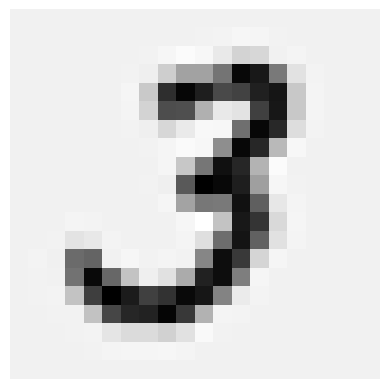

In [12]:
x_train = np.load("data/w3-hw3-train_x.npy")
y_train = np.load("data/w3-hw3-train_y.npy")
x_test = np.load("data/w3-hw3-test_x.npy")
y_test = np.load("data/w3-hw3-test_y.npy")

visualize(x_train,1234)

## Logistic Regression Models

Use sklearn's `LogisticRegression` to fit a multinomial logistic regression model on the training data. You may need to increase the `max_iter` argument for the model to converge.

Train 2 models: one using the One-vs-Rest method, and another that minimizes multinomial loss. You can do these by setting the `multi_class` argument to "ovr" and "multinomial", respectively.  

More information: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [17]:
ovr_model = OneVsRestClassifier( LogisticRegression(max_iter=5000, solver="liblinear", random_state=42))
ovr_model.fit(x_train, y_train)

y_train_pred_ovr = ovr_model.predict(x_train)
y_test_pred_ovr = ovr_model.predict(x_test)

multinomial_model = LogisticRegression(max_iter=5000, solver='lbfgs', random_state=42)
multinomial_model.fit(x_train, y_train)

y_train_pred_multi = multinomial_model.predict(x_train)
y_test_pred_multi = multinomial_model.predict(x_test)

## Accuracy

Compute and print the accuracy of each model on the training and testing sets as a percent.

In [18]:
ovr_train_accuracy = accuracy_score(y_train, y_train_pred_ovr)
ovr_test_accuracy = accuracy_score(y_test, y_test_pred_ovr)
multinomial_train_accuracy = accuracy_score(y_train, y_train_pred_multi)
multinomial_test_accuracy = accuracy_score(y_test, y_test_pred_multi)
print(f"OvR Training Accuracy: {ovr_train_accuracy * 100:.3f}")
print(f"OvR Testing Accuracy:  {ovr_test_accuracy * 100:.3f}")
print(f"Multinomial Training Accuracy: {multinomial_train_accuracy * 100:.3f}")
print(f"Multinomial Testing Accuracy:  {multinomial_test_accuracy * 100:.3f}")

OvR Training Accuracy: 94.825
OvR Testing Accuracy:  90.700
Multinomial Training Accuracy: 96.450
Multinomial Testing Accuracy:  91.400
